In [2]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [3]:
def create_bell_pair(qc):
    qc.h(0)
    qc.cx(0, 1)
    return qc


def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set(msg).issubset({"0", "1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc


def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

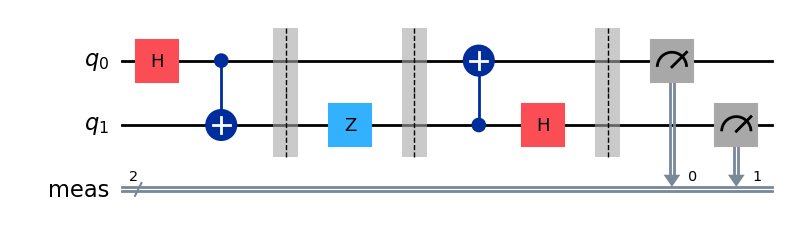

In [11]:
## PROTOCOL
qc = QuantumCircuit(2)

# create entangled pair
create_bell_pair(qc)
qc.barrier()

# encode message
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()

# decode message
qc = decode_message(qc)

qc.measure_all()

qc.draw(output='mpl')

{'10': 1024}


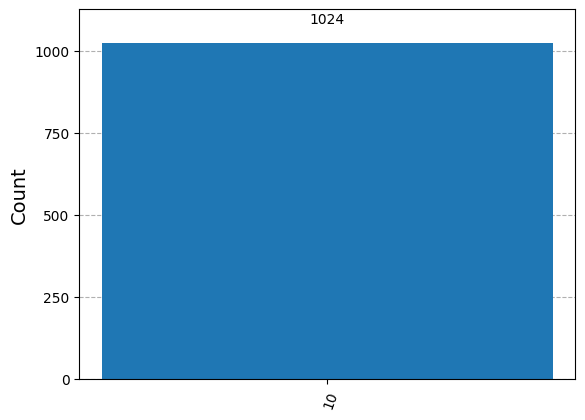

In [12]:
# SIMULATOR
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)